# Lab2: Linear regression using robust functions

**Carla Sendra Balcells**\
**Roxane Le Tensorer**\
**Rachel Trimble**

## Gradient Descent

### 1. Without Outliers

In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt

We first create the ramdomly generated a set of points. The generated points are in an array c containing 100 points in two dimensions. For the moment, all of them are coherent because they are organized around a 45° angle. Therefore, it should give a coherent result.

In [2]:
m = [0.,0.]
angle = 45*math.pi/180
rot = np.array([[math.cos(angle), -math.sin(angle)], [math.sin(angle),
math.cos(angle)]])
lamb = np.array([[100,0],[0,1]])
s = np.matmul(rot, np.matmul(lamb, rot.transpose()))
c = np.random.multivariate_normal(m,s,100)

In [3]:
c.shape

(100, 2)

We plot the 100 points on a graph.

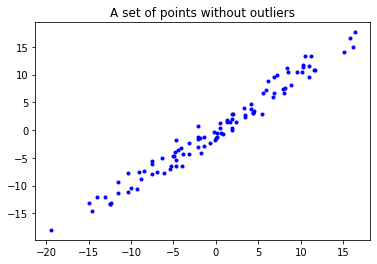

In [4]:
plt.plot(c[:,0], c[:,1], 'b.')
plt.title("A set of points without outliers")
plt.show()

We create the appropriate functions. <br>
- y_hat corresponds to the fitting line <br>
- lse corresponds to the square error of a single point <br>
- Q corresponds to the least square errors function. It is the sum of all the square errors, divided by two. This is the function we want to minimize. <br>
- gradQ corresponds to the Q gradient, so it is calculated by deriving the Q function.

In [5]:
def y_hat(w, x):
    return w[0]*x+w[1]

def lse(w, x, y):
    return (y_hat(w,x)-y)**2

def Q(w, x, y):
    return (1/2)*sum([lse(w, xi, yi) for xi, yi in zip(x, y)])

In [6]:
def gradQ(w, x, y):
    dQw0 = sum([(w[0]*xi + w[1] - yi)*xi for xi, yi in zip(x, y)])
    dQw1 = sum([(w[0]*xi + w[1] - yi) for xi, yi in zip(x, y)])
    return np.array([dQw0, dQw1])

We create now the gradient descent function. We decide to use a random starting w value.<br>
We use a backtracking for alpha. As stop conditions, we pay attention to : 
1. The difference between the least square errors function of the previous w value, and the least square errors function of the current w value. When this difference is low enough (under 10e-4), it means that the minimum is reached.
2. The value of the Q gradient. When this value is really low (under 10e-5), it means that the minimum is reached.

In [7]:
def grad_desc(x, y, alpha, max_iters):
    w0 = np.random.randn(2)
    for it in range(max_iters):

        # alpha-backtracking
        w = w0 - alpha*gradQ(w0, x, y)
        
        while(Q(w, x, y) > Q(w0, x, y)):
            alpha = alpha/2
            w = w0 - alpha*gradQ(w, x, y)
            
        #print(it, Q(w, x, y))
        
        if(np.abs(Q(w, x, y) - Q(w0, x, y)) < 10e-4) | (np.linalg.norm(gradQ(w, x, y)) < 10e-5):
            print("Number of iterations: "+str(it))
            print("Values of w: "+str(w[0])+", "+str(w[1]))
            break
        w0 = w 
        
    return w0

Number of iterations: 36985
Values of w: 0.9536957064163735, 0.08836495877911572


Text(0.5, 1.0, 'Regression without outliers')

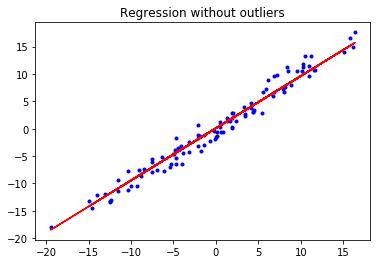

In [8]:
alpha = 1
max_iters = 100000

x, y = c[:, 0], c[:, 1]
plt.plot(x, y, 'b.')
w = grad_desc(x, y, alpha, max_iters)
plt.plot(x, [w[0]*xi + w[1] for xi in x], 'r')
plt.title("Regression without outliers")

We can see in this result that the line fits the set of data points well. We can even check what the coefficients of this line are, and it corresponds to the 45° angle we used for the random generation of the points. Indeed, an 45° slope means that the leading coefficient is equal to 1. Here, the leading coefficient is w[0], which is really close to 1. <br>
We can also notice that this algorithm is pretty long, because it requires approximatively 40000 iterations. <br>

### 2. With Outliers

Now, we try to use the same algorithm but with a non-coherent point. We duplicate c in order to create the array c_out. And then we modify the first point of this new array. Its value is now (-40, 20). This point doesn't correspond at all to the other ones, and we will analyse how well the algorithm deal with this value.

Number of iterations: 6971
Values of w: 0.720786899057471, 0.010471974559015313


Text(0.5, 1.0, 'Regression without outliers')

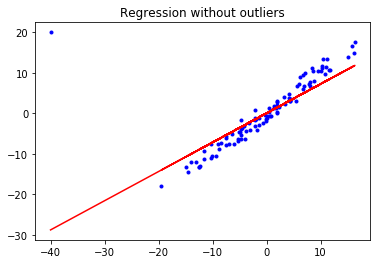

In [9]:
c_out = c.copy()
c_out[0]=[-40, 20]

x, y = c_out[:, 0], c_out[:, 1]
plt.plot(x, y, 'b.')
w = grad_desc(x, y, alpha, max_iters)
plt.plot(x, [w[0]*xi + w[1] for xi in x], 'r')
plt.title("Regression without outliers")

We can see now that the linear regression doesn't work well anymore. This leading coefficient is now far from 1, and we even visually see that the line doesn't correspond to the set of points. <br>
This is logical because, when the Q gradient is calculated, the outliers value is taken into account in the errors sum. This value is very far from the other ones, which means that the square error will be important and then have a big impact in this calculus.<br>
This is the reason why, in order to minimize the vertical distance with all of the points, the line is much more "horizontal" than what it is supposed to be.

## Cauchy

In order to avoid the problem of outliers points, we will now modify our algorithm with the Cauchy function.

## 1.

We can resume the least square function as $\sum_{i=1}^m \frac{1}{2}(e_i)$

This can also be written as $\sum_{i=1}^m \rho(e_i)$
with $\rho(u) = \frac{1}{2}(u)$ <br>

However, here, we are going to use another function for  $\rho(u)$ which is  $\rho(u) = \frac{1}{2}log[1+u^2]$ <br>
This function called the Cauchy function is supposed to be more robust than the simple least squares function we were using. Therefore, this should allows us not to be to much influenced by the outliers values.

In [10]:
u=np.linspace(-10,10,100)

In [11]:
def leastsquares(u):
    x=u
    y=.5*u**2
    return x,y

def cauchy(u):
    x=u
    y=.5*np.log(1+u**2)
    return x,y

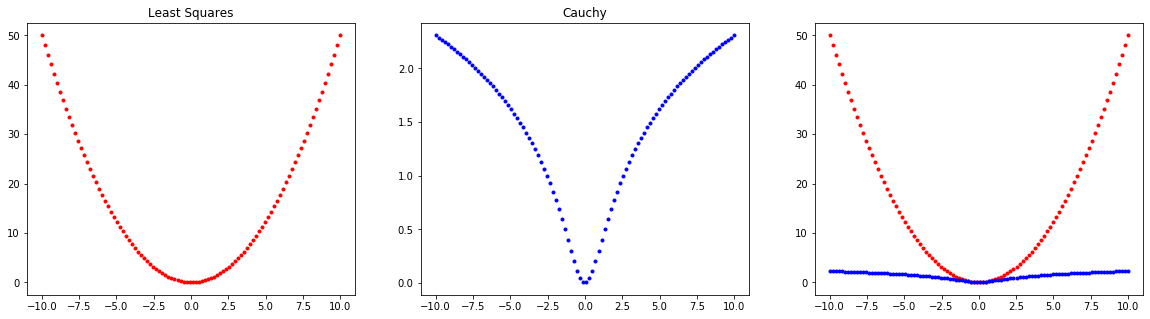

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize = (20, 5))
ax1.plot(leastsquares(u)[0], leastsquares(u)[1], 'r.')
ax1.set_title("Least Squares")

ax2.plot(cauchy(u)[0], cauchy(u)[1], 'b.')
ax2.set_title("Cauchy")

ax3.plot(leastsquares(u)[0], leastsquares(u)[1], 'r.')
ax3.plot(cauchy(u)[0], cauchy(u)[1], 'b.')

We can already see that the Cauchy seems less easily impactable by the outliers values. Indeed, the problem with the least squares function is that it is a second degree algorithm. This means that the big values will have a huge impact on the global calculus. This is a problem because, when we have a big value on the equation, it probably means that it is an outlier values, so it shouldn't be taken to much into consideration.<br>
On the contrary, the Cauchy function, which can also find the same solution as the least squares function, is a logarithmic function, which means that it gives much less importance to the big values. So this seems appropriate for our calculus: the outliers values will result in high errors but won't have a big impact on the algorithm.<br><br>
For example, let's calculate what would be the impact of the outlier value c1=(-40,20) with the least squares errors function and with the Cauchy function. <br>
In our first example, the leading coefficient is supposed to be 1, which means that the error u would be: $u = |1*(-40) - 20| = 60$<br><br>
Then, with the lsef, the impact of this single point would be: $\rho(60) = 1800$. <br>
On the contrary, with the Cauchy function, the impact of this point would be: $\rho(60) \approx 4$. <br><br>
We can then easily see that with the lse, it would have a huge impact on the sum calculus, whereas it's not the case with the Cauchy function.

## 2.

We were for the moment using a simplified form of the Cauchy function. The complete function is: <br>
$\rho(u) = \frac{c^2}{2}log\Bigl[1+\Bigl(\frac{u}{c}\Bigr)^2\Bigr]$<br>
with $c=1$ for the moment. The $c$ value will change later, so we also put it as a parameter of the function.

In [14]:
def y_hat(w, x):
    return w[0]*x+w[1]

def lse(c, w, x, y):
    return (c**2/2)*np.log(1+((y_hat(w,x)-y)/c)**2)

def Q(c, w, x, y):
    return ((c**2)/2)*sum([lse(c, w, xi, yi) for xi, yi in zip(x, y)])

In [15]:
def gradQ(c, w, x, y):
    dQw0 = (c**2)*sum([(xi*(w[0]*xi + w[1] - yi))/((w[0]*xi + w[1] - yi)**2+(c**2)) for xi, yi in zip(x, y)])
    dQw1 = (c**2)*sum([(w[0]*xi + w[1] - yi)/((w[0]*xi + w[1] - yi)**2+(c**2)) for xi, yi in zip(x, y)])
    return np.array([dQw0, dQw1])

In [17]:
def grad_desc(c, x, y, alpha, max_iters):
    w0 = np.random.randn(2)
    
    for it in range(max_iters):

        # alpha-backtracking
        w = w0 - alpha*gradQ(c, w0, x, y)
        
        while(Q(c, w, x, y) > Q(c, w0, x, y)):
            alpha = alpha/2
            w = w0 - alpha*gradQ(c, w, x, y)
        
        if(np.abs(Q(c, w, x, y) - Q(c, w0, x, y)) < 10e-4) | (np.linalg.norm(gradQ(c, w, x, y)) < 10e-5):
            print("Number of iterations: "+str(it))
            print("Values of w: "+str(w[0])+", "+str(w[1]))
            break
        w0 = w 
        
    return w0

## 3.

Now, we try the Cauchy function without any outliers for the moment. The $c$ value is 1.

Number of iterations: 399
Values of w: 0.9789000692661326, -0.3199776888798188


Text(0.5, 1.0, 'Cauchy without outliers')

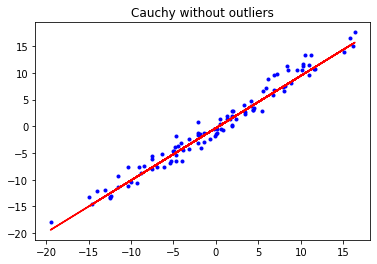

In [18]:
alpha = 1
max_iters = 100000
c1=1
x, y = c[:, 0], c[:, 1]
plt.plot(x, y, 'b.')
w = grad_desc(c1, x, y, alpha, max_iters)
plt.plot(x, [w[0]*xi + w[1] for xi in x], 'r')
plt.title("Cauchy without outliers")

We can see that the Cauchy function is very efficient here, in the situation without any outliers. The leading coefficient is even more close to 1 than what it was with the least squares method. <br>
We can also notice that this new algorithm is much faster, because it only needs between 300 and 400 iterations to reach the solution, whereas the least squares method required at least 30000 iterations.

## 4.

We can now try the algorithm with an outlier value. So we use the c_out array, containing one "wrong" value. 

Number of iterations: 74
Values of w: 0.9790407588426471, -0.30111966442019167


Text(0.5, 1.0, 'Cauchy with outliers')

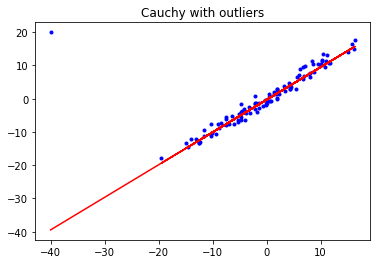

In [19]:
x, y = c_out[:, 0], c_out[:, 1]
plt.plot(x, y, 'b.')
w = grad_desc(c1, x, y, alpha, max_iters)
plt.plot(x, [w[0]*xi + w[1] for xi in x], 'r')
plt.title("Cauchy with outliers")

We can notice that the result doesn't change a lot, compared to the one without any outlier. The leading coefficient is a little bit further from 1, but it still closer than with the first method (using lse error funtion). The number of iterations is also a little bit higher, but it is still approximatively the same, and then it is again still 100 times better than with the first method. 

Comparing this to the squared error function we see the benefits of using the cauchy robust function in that it is able to facilitate outliers.

## 5.

For the moment, the $c$ value in the function $\rho(u) = \frac{c^2}{2}log\Bigl[1+\Bigl(\frac{u}{c}\Bigr)^2\Bigr]$ was always 1. We can now try different values, such as 100 and 1/100. 

Number of iterations: 157
Values of w: 0.976223227706208, -0.07904517965364408
Number of iterations: 1095
Values of w: 0.995538808613549, 0.07910107061644708
Number of iterations: 0
Values of w: -0.5379427313503331, 1.1109994155331722


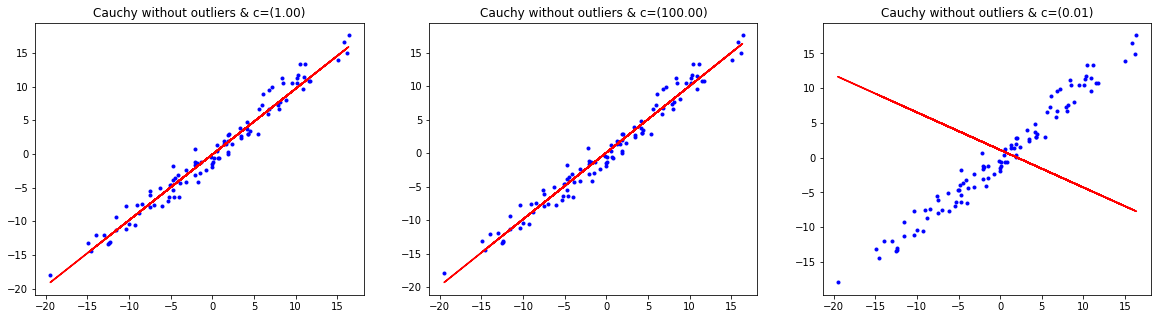

In [20]:
c1=np.array([1,100,1/100])

fig = plt.figure(figsize=(20,5))

num_plots = 3
base = 100 + num_plots * 10

for i in range(num_plots):
    c1_new=c1[i]
    ax = fig.add_subplot(base+(1+i))
    x, y = c[:, 0], c[:, 1]
    ax.plot(x, y, 'b.')
    w = grad_desc(c1_new, x, y, alpha, max_iters)
    ax.plot(x, [w[0]*xi + w[1] for xi in x], 'r')
    ax.set_title("Cauchy without outliers & c=(%.2f)" % c1_new)


##### First diagram
This is the situation we already experimented, with $c=1$.<br>
##### Second diagram
This is the situation with $c=100$.<br>
It's interesting to see here that the result is a little bit more precise, because the leading coefficient of the line is closer to 1 (0.98 instead of 0.96). However, this requires in average 10 times more iterations than with $c=1$. This is because a small error now impacts more the error function and so it is a bit more difficult to converge, but at the same time you get a better result.<br>
##### Third diagram
This is the situation with $c=0.01$.<br>
Here, the algorithm doesn't work at all because it stops at the first iteration. The result, then, is totaly random.<br>
The reason for that is the first stop condition: $(np.abs(Q(c, w, x, y) - Q(c, w0, x, y)) < 10e-4)$<br>
Indeed, the Q values obtained with $c=0.01$ are much smaller than the ones obtained with $c=1$. Therefore, the difference between two of these values is always under $10e-4$.<br>

So we can affirm that the c value determines how perfectionist we would like to be. 

## 6.

We will now try to determinate how many outliers values the algorithm can support without having problems. <br>
After having tried with different values, we finally notice that 39 outliers is the maximum number of outliers that the algorithm can support.<br>
As you can see below, we run the algorithm with 39 outliers and then with 40 outliers.

Number of iterations: 143
Values of w: 0.9653301994213734, -0.05116316960088543


Text(0.5, 1.0, 'Cauchy with 39 outliers')

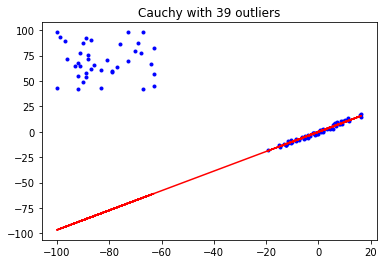

In [48]:
c1=1
c_out_5 = c.copy()
x = np.random.randint(-100, -60, 39)
y = np.random.randint(40, 100, 39)
c_new=np.column_stack((x, y))
c_out_5[:39]=c_new

x, y = c_out_5[:, 0], c_out_5[:, 1]
plt.plot(x, y, 'b.')
w = grad_desc(c1, x, y, alpha, max_iters)
plt.plot(x, [w[0]*xi + w[1] for xi in x], 'r')
plt.title("Cauchy with 39 outliers")

Number of iterations: 7
Values of w: -0.7926243460513547, -1.1687113369034756


Text(0.5, 1.0, 'Cauchy with 40 outliers')

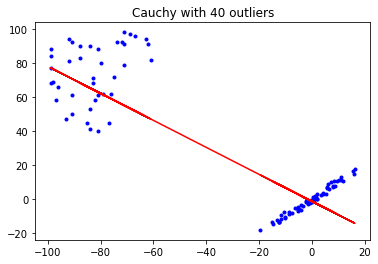

In [49]:
c_out_15 = c.copy()
x = np.random.randint(-100, -60, 40)
y = np.random.randint(40, 100,40)
c_new=np.column_stack((x, y))
c_out_15[:40]=c_new

x, y = c_out_15[:, 0], c_out_15[:, 1]
plt.plot(x, y, 'b.')
w = grad_desc(c1, x, y, alpha, max_iters)
plt.plot(x, [w[0]*xi + w[1] for xi in x], 'r')
plt.title("Cauchy with 40 outliers")

It is now interesing to see that, with 39 outliers, the algorithm still works. However, with 40 outliers values, it seems that the line is not correct and is more concerned about the outliers than about the "regular" points.<br>
There are 100 points in the array, 40 outliers and 60 normal ones. With this composition the Cauchy is no longer robust for outliers indicating there exists a treshold for which the Cauchy functions correctly. It